# Лабораторная работа 3: Машина опорных векторов (SVM)

<img src="svm_img.png" width=350>

Результат лабораторной работы — **отчет**. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Нам не интересен ваш код. Чем меньше кода, тем лучше всем: нам — меньше проверять, вам — проще найти ошибку или дополнить эксперимент.

Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Ответы на вопросы должны быть полными, четкими и хорошо аргументированными.

## 1. Квадратичное программирование и QP-солвер

Квадратичное программирование (QP) — специальный тип задач математической оптимизации, заключающийся в нахождении точки минимума неотрицательно-определенной квадратичной формы (многомерная парабола) в присутствии линейных ограничений:
$$
\begin{gather}
    \frac{1}{2}\boldsymbol x^T\boldsymbol P\boldsymbol x + \boldsymbol q^T\boldsymbol x \to \min_{\boldsymbol x} \\
    \begin{aligned}
        \text{s.t.} \quad & \boldsymbol G\boldsymbol x \le \boldsymbol h \\
        & \boldsymbol A\boldsymbol x = \boldsymbol b
    \end{aligned}
\end{gather}
$$

Здесь $\boldsymbol P$ — симметричная матрица. В ограничениях $\boldsymbol G\boldsymbol x \le \boldsymbol h$ и $\boldsymbol A\boldsymbol x = \boldsymbol b$ под знаками равенства и неравенства подразумевается сравнение всех компонент векторов.

Задача квадратичного программирования хорошо изучена, существуют эффективные алгоритмы для ее решения. Имеется множество библиотек с солверами для задачи QP, вот некоторые из них:
 - [CVXOPT](http://cvxopt.org/) (свободно-распространяемая, Python) **рекомендуется к использованию**
 - [Mosek](https://www.mosek.com/) (коммерческая с возможностью получения академической лицензии, C, Java, MATLAB, .NET, R, Python)
 - [Matlab Optimization Toolbox](http://www.mathworks.com/help/optim/ug/quadprog.html) 

#### Задание

1. Установите QP-солвер, разберитесь с его интерфейсом.
2. Протестируйте солвер, решив простую задачу оптимизации в двумерном пространстве:
$$f(\boldsymbol x) = -8x_1 - 16x_2 + x_1^2 + 4x_2^2, \quad \text{s.t.:} \; x_1 + x_2 \leq 5, \; 0 \leq x_1 \leq 3, \; x_2 \geq 0$$
3. Какие из ограничений-неравенств задачи являются _активными_, т.е. влияют на точку оптимума, а какие ограничения можно выбросить и точка оптимума не поменяется?

In [1]:
from cvxopt import solvers
from cvxopt import matrix
import numpy as np
from sklearn.base import BaseEstimator
import cvxopt as cvx
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification, make_circles
from matplotlib import pyplot as plt

In [234]:
P = matrix(np.diag([2, 8]), tc='d')
q = matrix(np.array([-8, -16]), tc='d')
G = matrix(np.array([[-1, 0],
                    [1, 0],
                    [0, -1],
                    [1, 1]]), tc='d')
h = matrix(np.array([0, 3, 0, 5]), tc='d')

sol = solvers.qp(P, q, G, h)

print(sol['x'])
print(sol['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -3.0512e+01 -3.8829e+01  8e+00  0e+00  2e-01
 1: -3.0792e+01 -3.1146e+01  4e-01  2e-16  5e-03
 2: -3.0982e+01 -3.1024e+01  4e-02  1e-16  4e-04
 3: -3.0997e+01 -3.1003e+01  6e-03  2e-16  5e-17
 4: -3.1000e+01 -3.1000e+01  7e-04  2e-16  3e-17
 5: -3.1000e+01 -3.1000e+01  1e-04  2e-16  4e-17
 6: -3.1000e+01 -3.1000e+01  1e-05  2e-16  3e-17
Optimal solution found.
[ 3.00e+00]
[ 2.00e+00]

-30.99999280553902


#### Проверю, какие из ограничений-неравенств задачи являются активными и влияют на точку оптимума:

Без условия $ - x_1 \leq 0 $ :

In [235]:
P = matrix(np.diag([2, 8]), tc='d')
q = matrix(np.array([-8, -16]), tc='d')
G = matrix(np.array([[1, 0],
                    [0, -1],
                    [1, 1]]), tc='d')
h = matrix(np.array([3, 0, 5]), tc='d')

sol = solvers.qp(P, q, G, h)

print(sol['x'])
print(sol['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -3.1547e+01 -3.0486e+01  1e+01  5e-01  3e-01
 1: -3.0164e+01 -3.1582e+01  1e+00  4e-17  1e-17
 2: -3.0958e+01 -3.1037e+01  8e-02  2e-16  7e-17
 3: -3.0994e+01 -3.1006e+01  1e-02  2e-16  2e-17
 4: -3.0999e+01 -3.1001e+01  2e-03  0e+00  4e-17
 5: -3.1000e+01 -3.1000e+01  2e-04  2e-16  6e-17
 6: -3.1000e+01 -3.1000e+01  3e-05  0e+00  3e-17
 7: -3.1000e+01 -3.1000e+01  4e-06  8e-17  4e-17
Optimal solution found.
[ 3.00e+00]
[ 2.00e+00]

-30.99999778449002


Без условия $ x_1 \leq 3 $ :

In [236]:
P = matrix(np.diag([2, 8]), tc='d')
q = matrix(np.array([-8, -16]), tc='d')
G = matrix(np.array([[-1, 0],
                    [0, -1],
                    [1, 1]]), tc='d')
h = matrix(np.array([0, 0, 5]), tc='d')

sol = solvers.qp(P, q, G, h)

print(sol['x'])
print(sol['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -3.0419e+01 -3.8120e+01  8e+00  0e+00  2e-16
 1: -3.1027e+01 -3.1339e+01  3e-01  2e-16  4e-17
 2: -3.1196e+01 -3.1201e+01  6e-03  2e-16  2e-17
 3: -3.1200e+01 -3.1200e+01  6e-05  1e-16  4e-17
 4: -3.1200e+01 -3.1200e+01  6e-07  1e-16  4e-17
Optimal solution found.
[ 3.20e+00]
[ 1.80e+00]

-31.199999566149053


Без условия $ - x_2 \leq 0 $ :

In [237]:
P = matrix(np.diag([2, 8]), tc='d')
q = matrix(np.array([-8, -16]), tc='d')
G = matrix(np.array([[-1, 0],
                    [1, 0],
                    [1, 1]]), tc='d')
h = matrix(np.array([0, 3, 5]), tc='d')

sol = solvers.qp(P, q, G, h)

print(sol['x'])
print(sol['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -3.0547e+01 -3.4734e+01  4e+00  0e+00  3e-01
 1: -3.0841e+01 -3.1065e+01  2e-01  2e-16  7e-03
 2: -3.0992e+01 -3.1009e+01  2e-02  8e-17  4e-04
 3: -3.0999e+01 -3.1001e+01  2e-03  2e-16  4e-17
 4: -3.1000e+01 -3.1000e+01  3e-04  0e+00  2e-17
 5: -3.1000e+01 -3.1000e+01  4e-05  0e+00  3e-17
 6: -3.1000e+01 -3.1000e+01  6e-06  8e-17  6e-17
Optimal solution found.
[ 3.00e+00]
[ 2.00e+00]

-30.99999695228387


Без условия $ x_1 + x_2 \leq 5 $ :

In [238]:
P = matrix(np.diag([2, 8]), tc='d')
q = matrix(np.array([-8, -16]), tc='d')
G = matrix(np.array([[-1, 0],
                    [1, 0],
                    [0, -1],]), tc='d')
h = matrix(np.array([0, 3, 0]), tc='d')

sol = solvers.qp(P, q, G, h)

print(sol['x'])
print(sol['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -3.0240e+01 -3.7371e+01  7e+00  0e+00  2e-01
 1: -3.0901e+01 -3.1124e+01  2e-01  1e-16  5e-03
 2: -3.0999e+01 -3.1001e+01  3e-03  7e-17  6e-05
 3: -3.1000e+01 -3.1000e+01  3e-05  0e+00  6e-07
 4: -3.1000e+01 -3.1000e+01  3e-07  2e-16  6e-09
Optimal solution found.
[ 3.00e+00]
[ 2.00e+00]

-30.999999858273384


**Ответ:** Ограничение $ x_1 \leq 3 $ является **активным**, при его ислючении точка оптимума меняется. Остальные ограничения на точку оптимума не влияют, их можно исключить

## 2. Линейный SVM

Рассмотрим задачу бинарной классификации. Будем обозначать обучающую выборку $\{(\boldsymbol x_n, y_n)\}_{n=1}^N$, где $N$ — количество объектов, $\boldsymbol x_n \in \mathbb{R}^d$ — числовой вектор признакового описания объекта, $y_n \in \{+1, -1\}$ — класс объекта.

Машина опорных векторов обучает модель разделяющей гиперплоскости:
$$f(\boldsymbol x) = \boldsymbol w^T \boldsymbol x + b$$
Параметры модели — вектор весов $\boldsymbol w \in \mathbb{R}^d$ и сдвиг $b \in \mathbb{R}$.

Обучение модели происходит путем решения оптимизационной задачи:
$$
\begin{gather}
    \frac{1}{2} \| \boldsymbol w \|^2 + C \sum_{n=1}^N \xi_n \to \min_{\boldsymbol w, \boldsymbol \xi, b} \\
    \text{s.t.: } \quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1 - \xi_n, \quad \xi_n \geq 0, \quad \forall n=1,\dots,N
\end{gather}
$$

Ограничения вида $\quad y_n (\boldsymbol w^T \boldsymbol x_n + b) \geq 1$ требуют, чтобы объекты правильно классифицировались разделяющей гиперплоскостью. Поскольку линейная разделимость выборки не гарантируется на практике, вводят переменные $\xi_n$ (slack variables), которые ослабляют ограничения правильной классификации. В оптимизируемом функционале слагаемое $\| \boldsymbol w \|^2$ штрафует малую ширину разделяющей гиперплоскости, сумма $\sum_n \xi_n$ штрафует ослабление ограничений. 

Гиперпараметр $C$ задает баланс между шириной разделяющей полосы и ошибками, допускаемыми классификатором. Обратите внимание, что $C$ фиксируется до обучения и не оптимизируется вместе с параметрами модели.

Гиперпараметр $C$ отвечает за обобщающую способность разделяющей гиперплоскости, высокая обобщающая способность (соотвествующая большому значению $C$) может привести к переобучению, если линейная модель хорошо описывает обучающие примеры. При подборе оптимального параметра $C$ необходимо оценивать качество на отложенной выборке или кросс-валидации. Как правило, для конкретной задачи заранее неизвестно, какой порядок имеет оптимальное значение гиперпараметра $C$, поэтому перебирать значения лучше по логарифмической сетке, например: $10^{-3}, 10^{-2}, \dots, 10^{5}$.

После нахождения решения оптимизационной задачи $(\boldsymbol w_{\star}, \boldsymbol \xi_{\star}, b_{\star})$, часть ограничений становятся _активными_, т.е. переходят в "крайнее положение" — точное равенство:
$$\quad y_n (\boldsymbol w_{\star}^T \boldsymbol x_n + b_{\star}) = 1 - \xi_{\star,n}$$
Объекты, соответствующие активным ограничениям называются _опорными_.

#### Явное преобразование признаков

Разделяющая гиперплоскость — достаточно грубая модель, редко данные могут быть описаны линейной моделью. Линейная неразделимость векторов может быть исправлена путем перехода в другое признаковое пространство, в котором линейная модель лучше описывает данные и, возможно, существует правильно классифицирующая разделяющая гиперплоскость:

$$\boldsymbol x \in \mathbb{R}^d \mapsto \phi(\boldsymbol x) \in \mathbb{R}^t$$

Так, например, добавление всех попарных произведений признаков: $\phi(x_1, \dots, x_d) = (x_1, \dots, x_d, x_1^2, x_1x_2, \dots, x_d^2)$ переводит в пространство, в котором линейная гиперплоскость является квадратичной формой в исходном пространстве и в исходном пространстве признаков разделяющая поверхность может быть, скажем, эллипсом.

[Видеоролик с демонстрацией](https://youtu.be/9NrALgHFwTo)

#### Задание
  1. Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.
  2. Сгенерируйте три случайные двумерные выборки для бинарной классификации:
    - с линейно-разделимыми классами
    - с хорошо разделимыми классами, но не линейно
    - с плохо разделимыми классами по имеющимся признакам
  3. Протестируйте линейный SVM на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Постройте классификаторы с различным значением параметра $C$.
  4. Как зависит число опорных векторов от параметра $C$ для различных выборок?
  5. Используя явное преобразование признаков обучите методом опорных векторов квадратичную разделяющую поверхность. Покажите ее на плоскости.

## 1  
Сведите задачу обучения линейного SVM к QP, реализуйте процедуру обучения Линейного SVM при помощи QP-солвера.

In [2]:
def square_transform(X):
    '''
    f(x_1, ..., x_d) = (x_1, ... x_d, x_1^2, x_1x_2, ..., x_d^2)
    '''
    M = X.shape[0]
    N = X.shape[1]
    poly = PolynomialFeatures(2)
    X_new = poly.fit_transform(X)
    X_new = X_new[:, 1:]
    
    return X_new

class LinearSVM(BaseEstimator):
    def __init__(self, C, transform=None):
        self.C = C
        self.transform = transform
    
    def compute_cvx_matrices(self, X, y, N, M):
        P = np.zeros((N + 1 + M, N + 1 + M))
        P[:N,:N] = np.eye(N)
        q = np.hstack(([0.] * (N + 1), [self.C] * M))
        G1 = np.hstack((-y.reshape(M, 1) * X, -y.reshape(M, 1), -np.eye(M)))
        G2 = np.hstack((np.zeros((M, N + 1)), -np.eye(M))) 
        G = np.vstack((G1, G2))
        h = np.hstack(([-1.] * M, [0.] * M))
        P = cvx.matrix(P)
        q = cvx.matrix(q)
        G = cvx.matrix(G)
        h = cvx.matrix(h)
        return P, q, G, h
    
    def fit(self, X, y):
        """
        Функция обучения модели.
        """
        M = X.shape[0]
        N = X.shape[1]
        assert X.shape[0] == len(y)
        self.weights = np.empty(M)
        self.bias = 0
        P, q, G, h = self.compute_cvx_matrices(X, y, N, M)
        sol = cvx.solvers.qp(P, q, G, h)
        self.weights = np.array(sol['x'][:N]).flatten()
        self.bias = np.array(sol['x'][N : N + 1]).flatten()
        self.ksi = np.array(sol['x'][N + 1:]).flatten()
        print(self.weights)
        solvers.options['show_progress'] = False
        #raise NotImplementedError() 
    
    def predict_proba(self, X):
        return (np.dot(X, self.weights) + self.bias).flatten()
            
    def predict(self, X):
        return np.sign(self.predict_proba(X))
    
    

## Линейно-разделимые классы

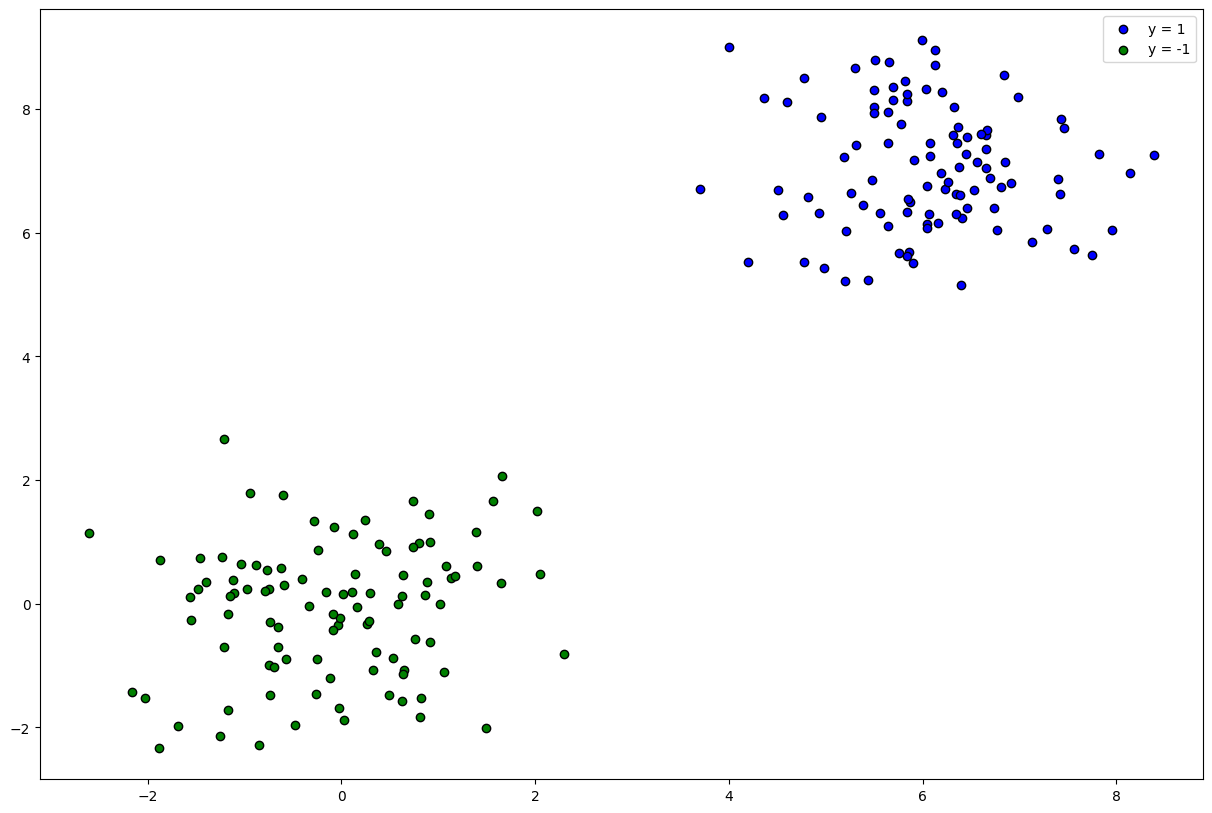

In [26]:
plt.figure(figsize=(15, 10))
mean0 = [6, 7]
cov0 = [[1, 0], [0, 1]]  # diagonal covariance
X_0 = np.random.multivariate_normal(mean0, cov0, 100)

mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
X_1 = np.random.multivariate_normal(mean1, cov1, 100)

X1 = np.vstack((X_0, X_1))
y1 = np.hstack((-np.ones(X_0.shape[0]), np.ones(X_0.shape[0])))

plt.scatter(X_0[:, 0], X_0[:, 1], c='blue', edgecolor='k')
plt.scatter(X_1[:, 0], X_1[:, 1], c='green', edgecolor='k')
plt.legend(['y = 1', 'y = -1'])

plt.xlim([min(X1[:, 0]) - 0.5, max(X1[:, 0]) + 0.5])
plt.ylim([min(X1[:, 1]) - 0.5, max(X1[:, 1]) + 0.5])
plt.show()

[-0.21822503 -0.24875435]


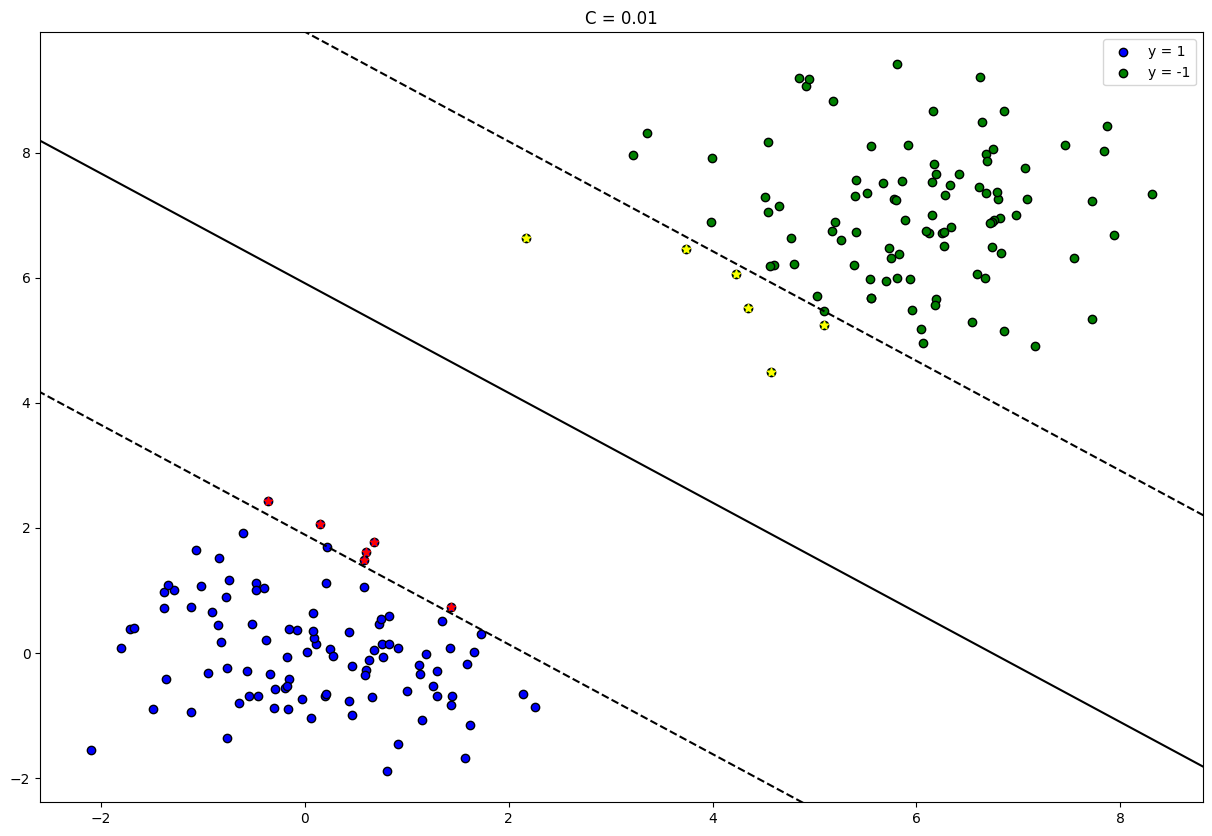

[-0.28838779 -0.32311263]


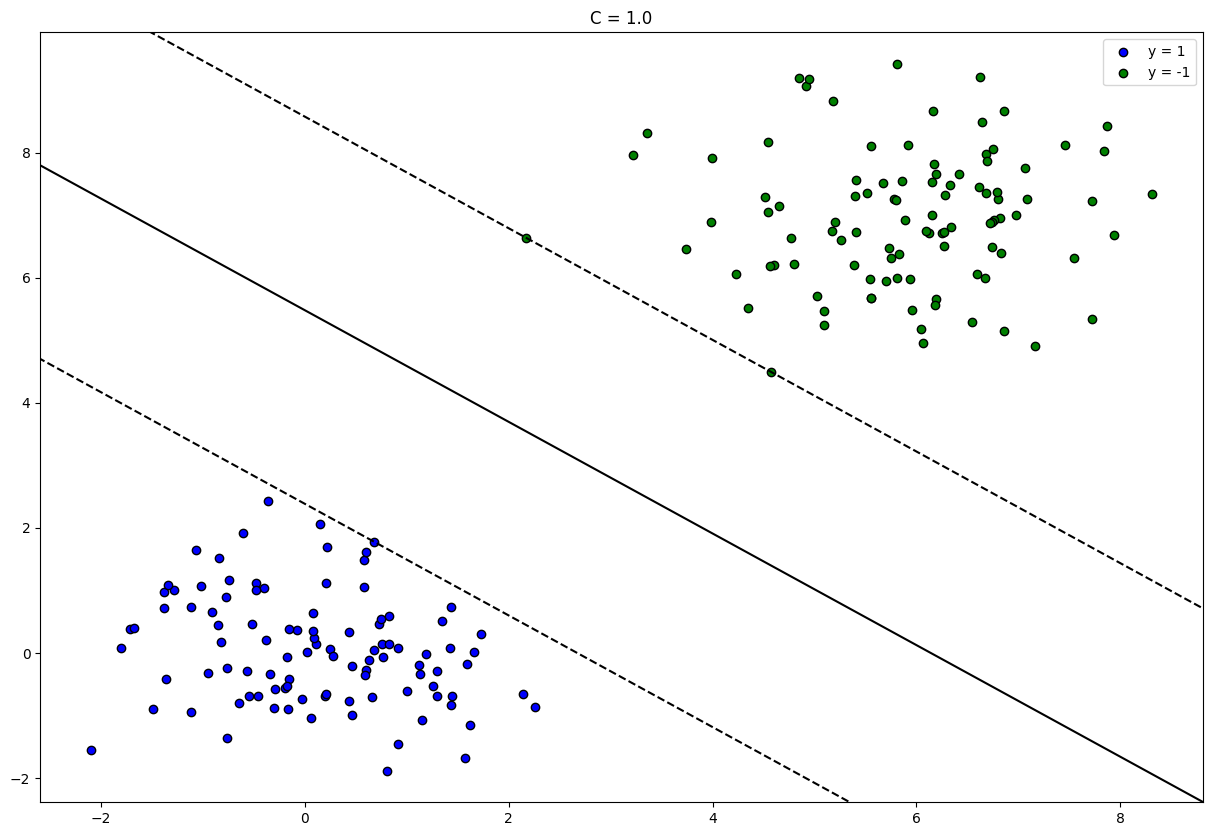

[-0.28838779 -0.32311263]


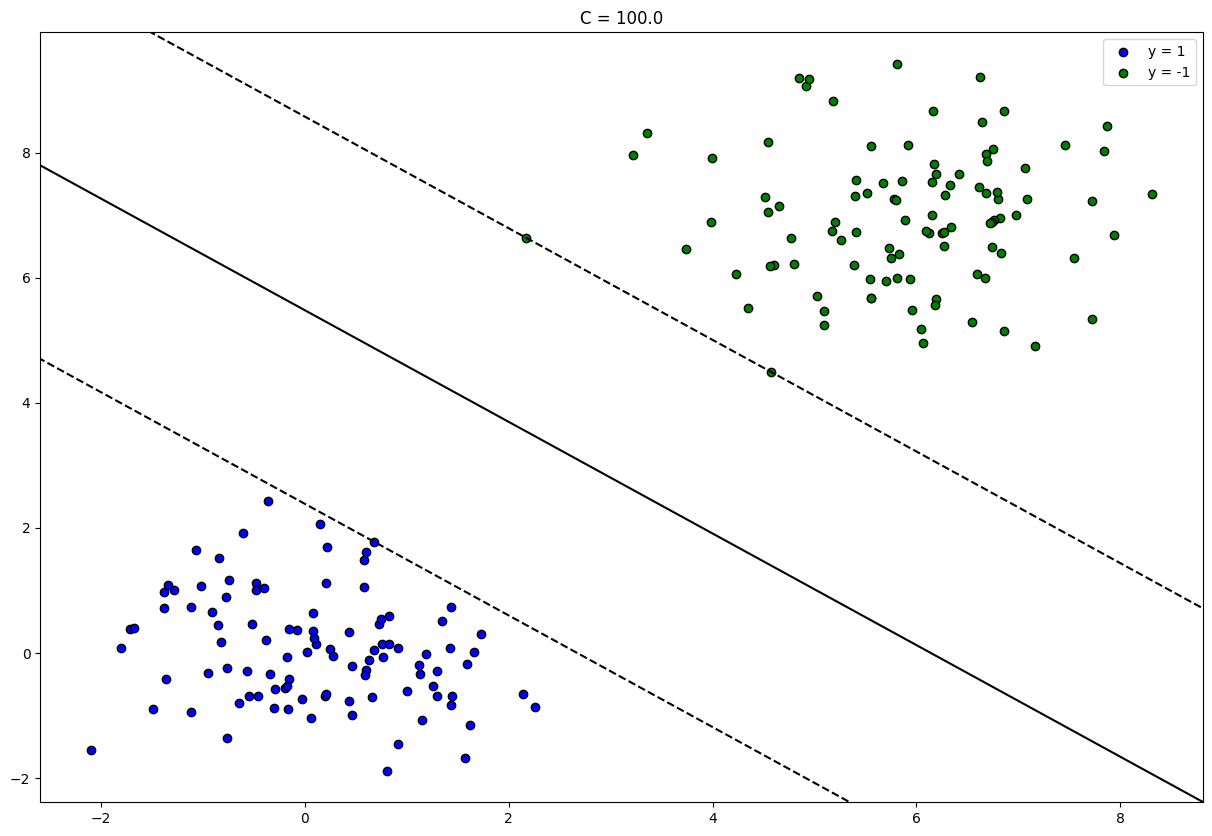

In [8]:
C1 = 10. ** np.array([-2, 0, 2])
X, y = X1, y1

for i in range(len(C1)):
    C = C1[i]
    model = LinearSVM(C)
    model.fit(X, y)
    weights = model.weights
    bias = model.bias
    ksi = model.ksi
    y = model.predict(X)
    plt.figure(figsize=(15, 10))
    plt.scatter(X[(y == 1), 0], X[(y == 1), 1], c='blue', edgecolor='k')
    plt.scatter(X[(y == -1), 0], X[(y == -1), 1], c='green', edgecolor='k')
    plt.legend(['y = 1', 'y = -1'])
    
    X_V = model.predict_proba(X)
    ind = (y * X_V <= 1) * (y * X_V >= -1)
    vect_0 = X[(y == 1) * ind]
    vect_1 = X[(y == -1) * ind]
    
    plt.scatter(vect_0[:, 0], vect_0[:, 1], c='red',  marker = '*')
    plt.scatter(vect_1[:, 0], vect_1[:, 1], c='yellow', marker = '*')
    
    xx = np.linspace(-5, 15, 10)
    
    plt.plot(xx, (- weights[0] * xx - bias) / weights[1],  color = "black")
    plt.plot(xx, (- weights[0] * xx - bias + 1) / weights[1],  color = "black", linestyle = '--')
    plt.plot(xx, (- weights[0] * xx - bias - 1) / weights[1],  color = "black", linestyle = '--')
    
    plt.xlim([min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5])
    plt.ylim([min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5])
    plt.title('C = '+str(C))
    plt.show()

## Линейно-неразделимые классы

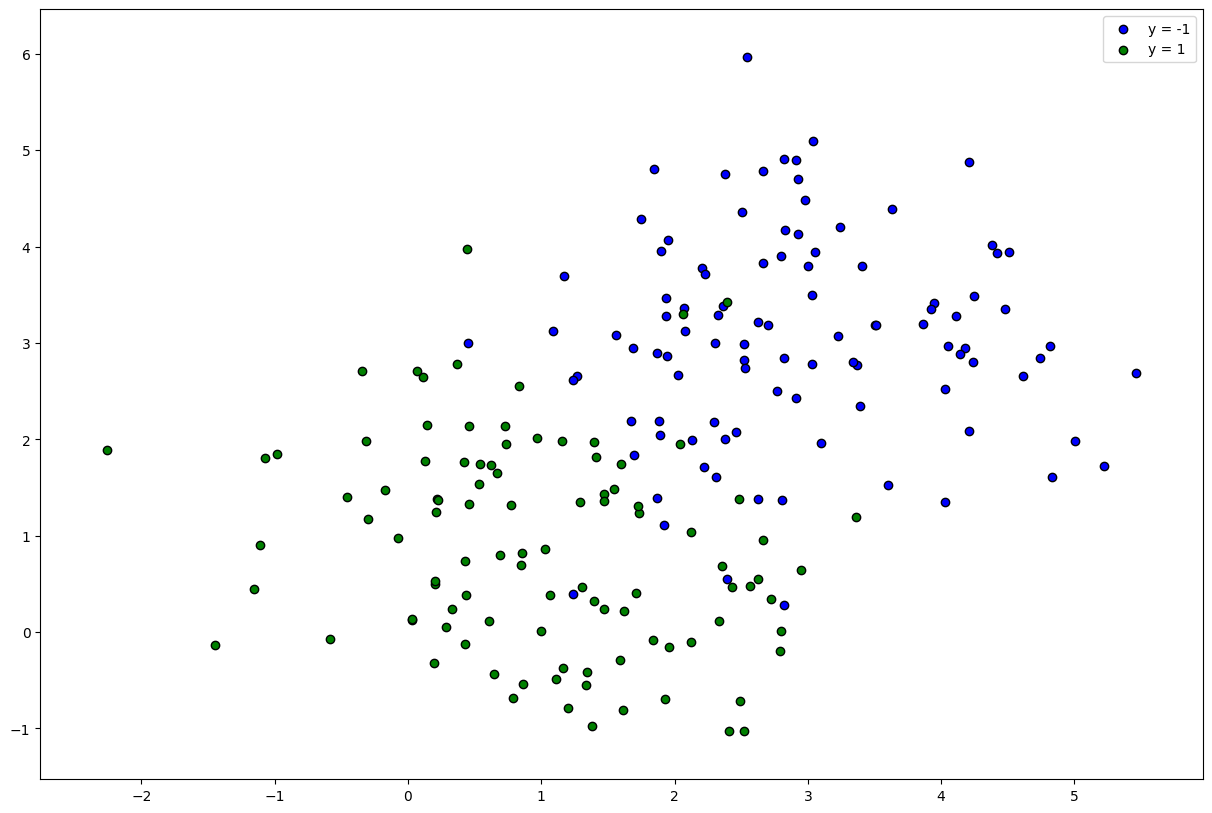

In [27]:
plt.figure(figsize=(15, 10))

mean0 = [3, 3]
cov0 = [[1, 0], [0, 1]]  # diagonal covariance
X_0 = np.random.multivariate_normal(mean0, cov0, 100)

mean1 = [1, 1]
cov1 = [[1, 0], [0, 1]]
X_1 = np.random.multivariate_normal(mean1, cov1, 100)

X2 = np.vstack((X_0, X_1))
y2 = np.hstack((-np.ones(X_0.shape[0]), np.ones(X_0.shape[0])))

plt.scatter(X_0[:, 0], X_0[:, 1], c='blue', edgecolor='k')
plt.scatter(X_1[:, 0], X_1[:, 1], c='green', edgecolor='k')
plt.legend(['y = -1', 'y = 1'])

plt.xlim([min(X2[:, 0]) - 0.5, max(X2[:, 0]) + 0.5])
plt.ylim([min(X2[:, 1]) - 0.5, max(X2[:, 1]) + 0.5])
plt.show()

[-0.49205238 -0.48637259]


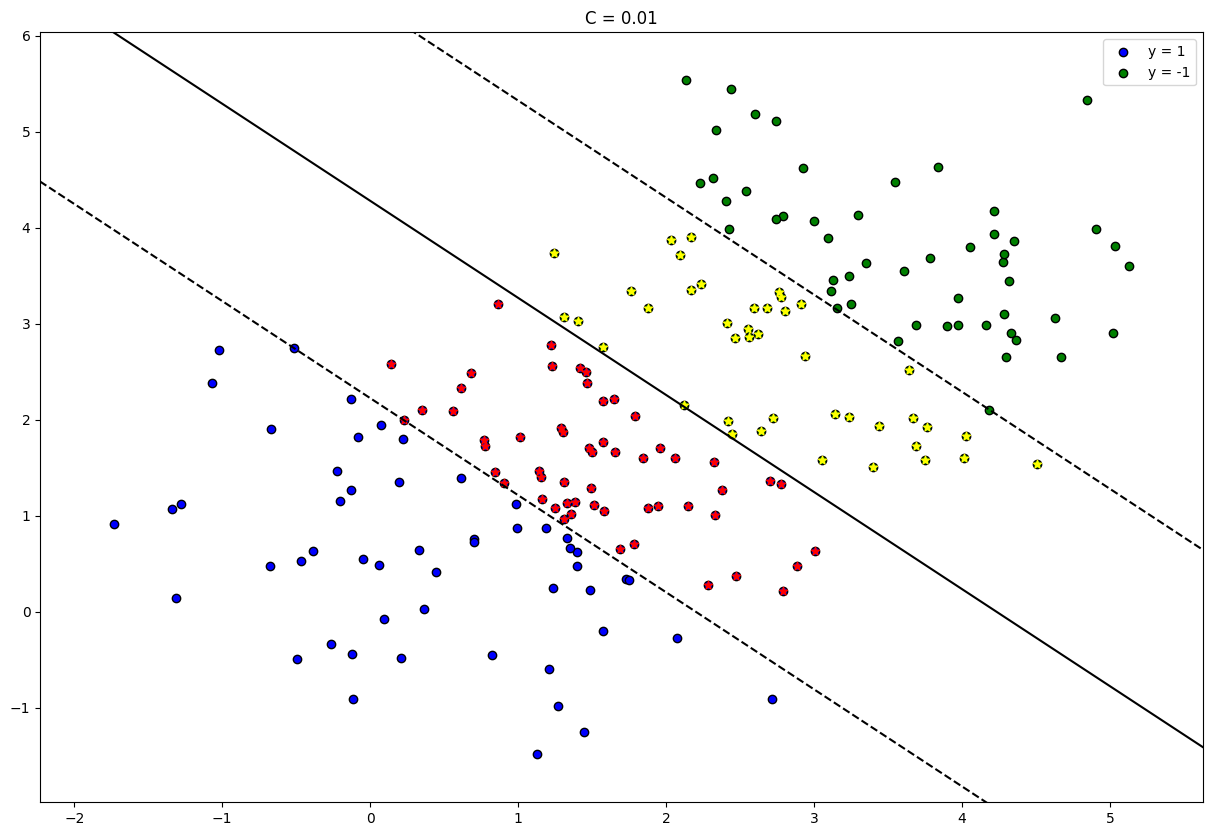

[-2.19613183 -1.89261277]


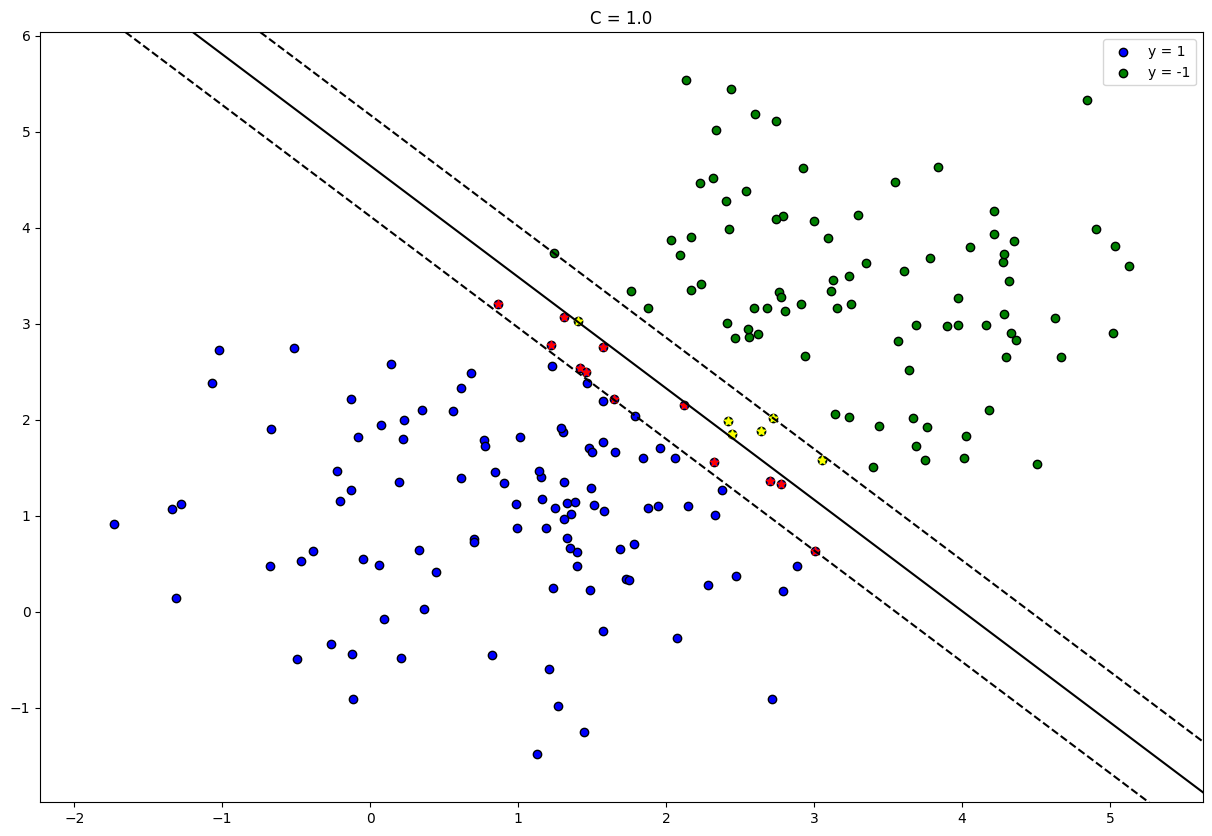

[-10.14307341  -8.52784525]


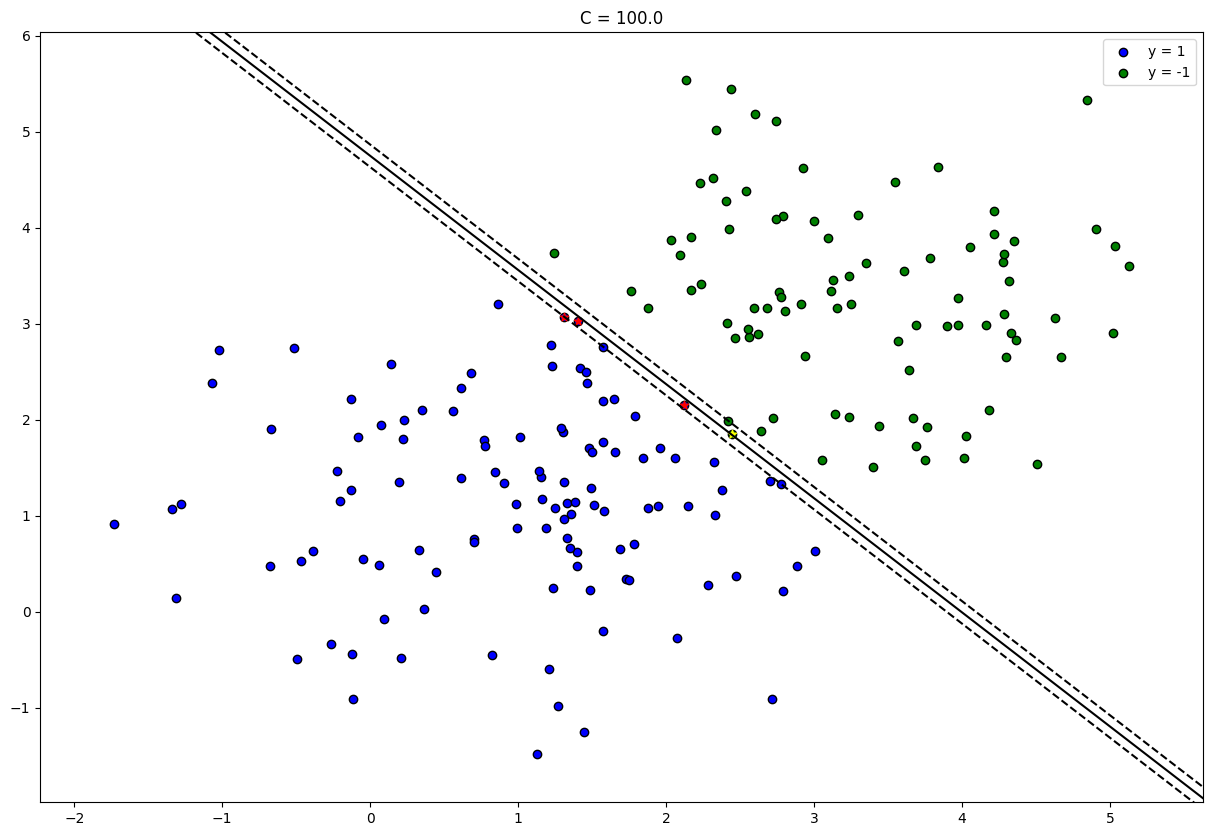

In [18]:
C1 = 10. ** np.array([-2, 0, 2])
X, y = X2, y2
for i in range(len(C1)):
    C = C1[i]
    model = LinearSVM(C)
    model.fit(X, y)
    weights = model.weights
    bias = model.bias
    ksi = model.ksi
    y = model.predict(X)
    plt.figure(figsize=(15, 10))
    plt.scatter(X[(y == 1), 0], X[(y == 1), 1], c='blue', edgecolor='k')
    plt.scatter(X[(y == -1), 0], X[(y == -1), 1], c='green', edgecolor='k')
    plt.legend(['y = 1', 'y = -1'])
    
    X_V = model.predict_proba(X)
    ind = (y * X_V <= 1) * (y * X_V >= -1)
    vect_0 = X[(y == 1) * ind]
    vect_1 = X[(y == -1) * ind]
    
    plt.scatter(vect_0[:, 0], vect_0[:, 1], c='red',  marker = '*')
    plt.scatter(vect_1[:, 0], vect_1[:, 1], c='yellow', marker = '*')
    
    xx = np.linspace(-5, 15, 3000)
    
    plt.plot(xx, (- weights[0] * xx - bias) / weights[1],  color = "black")
    plt.plot(xx, (- weights[0] * xx - bias + 1) / weights[1],  color = "black", linestyle = '--')
    plt.plot(xx, (- weights[0] * xx - bias - 1) / weights[1],  color = "black", linestyle = '--')
    
    plt.xlim([min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5])
    plt.ylim([min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5])
    plt.title('C = '+str(C))
    plt.show()

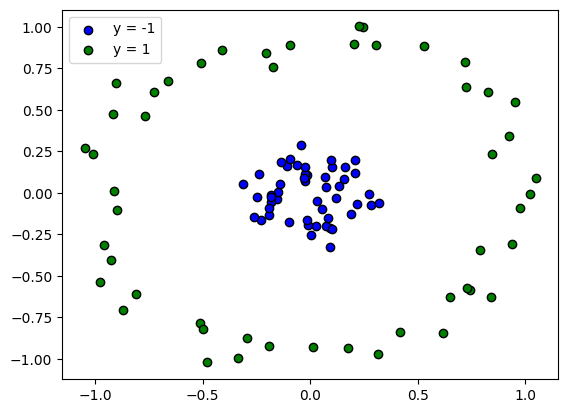

In [28]:
X3, y3 = make_circles(n_samples = 100, factor = 0.2, noise = 0.08, random_state = 1)
y3 = np.where(y3 == 0, -1, 1)

plt.scatter(X3[y3 == 1][:, 0], X3[y3 == 1][:, 1], c='blue', edgecolor='k')
plt.scatter(X3[y3 == -1][:, 0], X3[y3 == -1][:, 1], c='green', edgecolor='k')
plt.legend(['y = -1', 'y = 1'])
plt.show()

[ 1.08580052 -0.93146077]


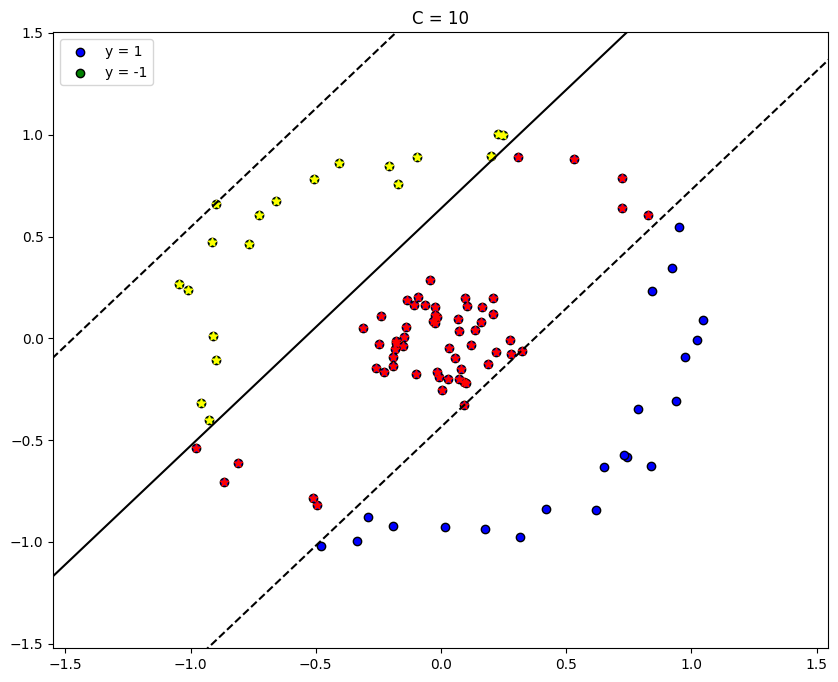

In [15]:
X, y = X3, y3

C = 10
model = LinearSVM(C)
model.fit(X, y)
weights = model.weights
bias = model.bias
ksi = model.ksi
y = model.predict(X)
plt.figure(figsize=(10, 8))
plt.scatter(X[(y == 1), 0], X[(y == 1), 1], c='blue', edgecolor='k')
plt.scatter(X[(y == -1), 0], X[(y == -1), 1], c='green', edgecolor='k')
plt.legend(['y = 1', 'y = -1'])

X_V = model.predict_proba(X)
ind = (y * X_V <= 1) * (y * X_V >= -1)
vect_0 = X[(y == 1) * ind]
vect_1 = X[(y == -1) * ind]

plt.scatter(vect_0[:, 0], vect_0[:, 1], c='red',  marker = '*')
plt.scatter(vect_1[:, 0], vect_1[:, 1], c='yellow', marker = '*')

xx = np.linspace(-5, 15, 3000)

plt.plot(xx, (- weights[0] * xx - bias) / weights[1],  color = "black")
plt.plot(xx, (- weights[0] * xx - bias + 1) / weights[1],  color = "black", linestyle = '--')
plt.plot(xx, (- weights[0] * xx - bias - 1) / weights[1],  color = "black", linestyle = '--')

plt.xlim([min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5])
plt.ylim([min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5])
plt.title('C = '+str(C))
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier

X_transform = square_transform(X3)
x1 = X_transform[:, 0].reshape((-1, 1))
x2 = X_transform[:, 1].reshape((-1, 1))
x3 = (x1 ** 2 + x2 ** 2)

X = np.hstack((x1, x3))
y = y3

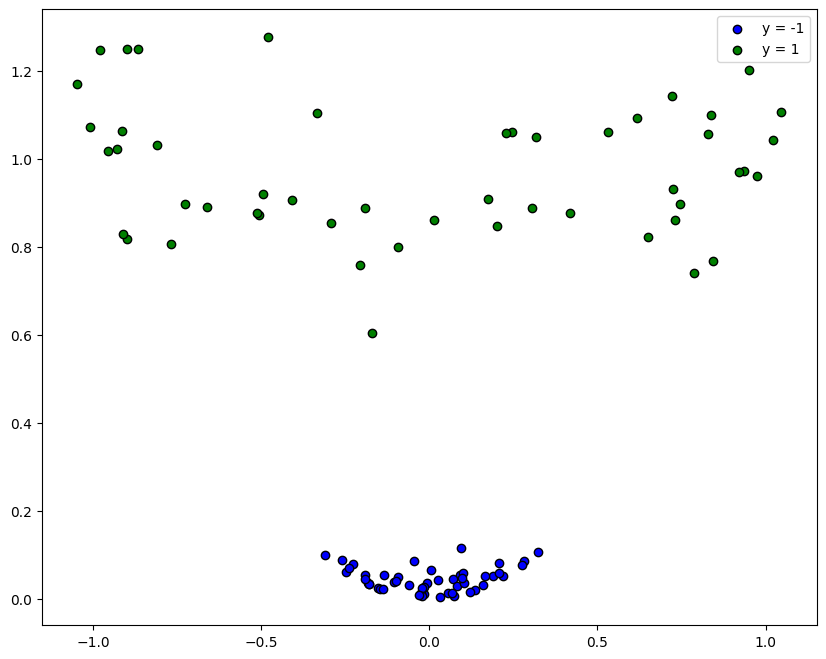

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', edgecolor='k')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='green', edgecolor='k')
plt.legend(['y = -1', 'y = 1'])
plt.show()

[ 0.159724   -4.01955374]


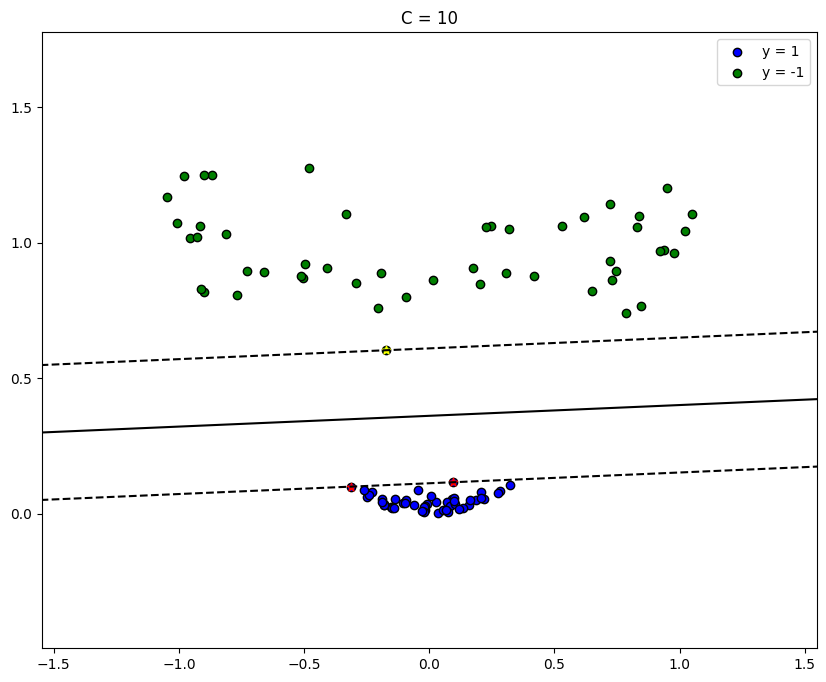

In [18]:
C = 10
model = LinearSVM(C)
model.fit(X, y)
weights = model.weights
bias = model.bias
ksi = model.ksi
y = model.predict(X)
plt.figure(figsize=(10, 8))
plt.scatter(X[(y == 1), 0], X[(y == 1), 1], c='blue', edgecolor='k')
plt.scatter(X[(y == -1), 0], X[(y == -1), 1], c='green', edgecolor='k')
plt.legend(['y = 1', 'y = -1'])

X_V = model.predict_proba(X)
eps = 0.05
ind = (y * X_V <= 1 + eps) * (y * X_V >= -1 + eps)
vect_0 = X[(y == 1) * ind]
vect_1 = X[(y == -1) * ind]

plt.scatter(vect_0[:, 0], vect_0[:, 1], c='red',  marker = '*')
plt.scatter(vect_1[:, 0], vect_1[:, 1], c='yellow', marker = '*')

xx = np.linspace(-5, 15, 3000)

plt.plot(xx, (- weights[0] * xx - bias) / weights[1],  color = "black")
plt.plot(xx, (- weights[0] * xx - bias + 1) / weights[1],  color = "black", linestyle = '--')
plt.plot(xx, (- weights[0] * xx - bias - 1) / weights[1],  color = "black", linestyle = '--')

plt.xlim([min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5])
plt.ylim([min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5])
plt.title('C = '+str(C))
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_18264\2400899643.py:33: UserWarning: The following kwargs were not used by contour: 'linestyle'
  plt.contour(xx, yy, zz, levels=(-1,), colors='k', linewidths=1.5, linestyle='--', zorder=3)


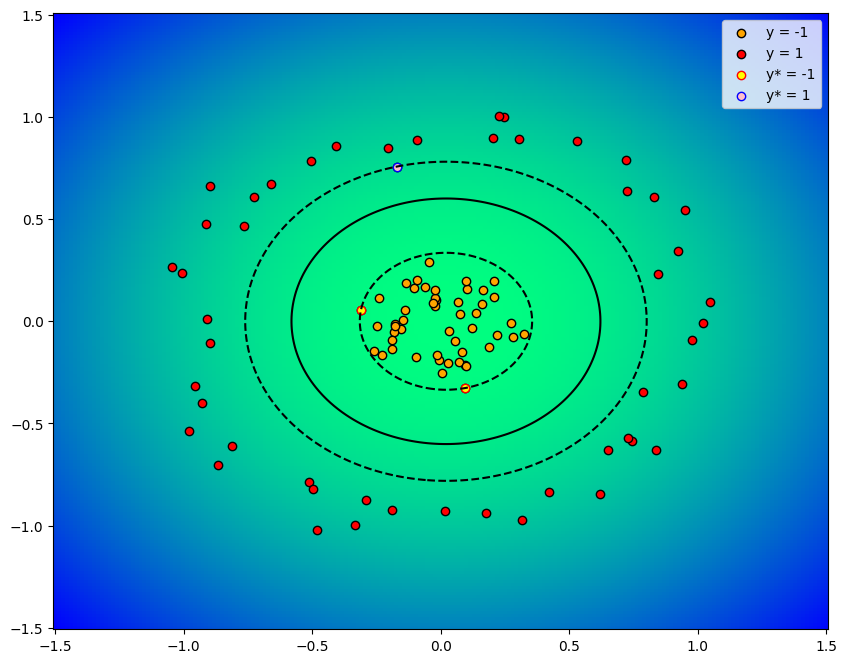

In [20]:
plt.figure(figsize=(10, 8))

X = np.hstack((x1, x2))
new_X = np.hstack((x1, x3))

xx_vals = np.linspace(-1.5, 1.5, 200)
yy_vals = np.linspace(-1.5, 1.5, 200)

xx, yy = np.meshgrid(xx_vals, yy_vals)
xxyy = xx ** 2 + yy ** 2

zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), xxyy.ravel()]), yy.shape)

X_V = model.predict_proba(new_X)
eps = 0.05
ind = (y * X_V <= 1 + eps) * (y * X_V >= -1 + eps)
vect_0 = X[(y == 1) * ind]
vect_1 = X[(y == -1) * ind]

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', edgecolor='k')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', edgecolor='k')

plt.scatter(vect_0[:, 0], vect_0[:, 1], c='yellow', edgecolor='red')
plt.scatter(vect_1[:, 0], vect_1[:, 1], c='pink', edgecolor='blue')
plt.legend(['y = -1', 'y = 1', 'y* = -1', 'y* = 1'])

# Цветной фон, соответствующий значению решающего правила
plt.pcolormesh(xx, yy, zz, cmap='winter', zorder=0)

# Линия уровня, соответствующая значению 0.5
plt.contour(xx, yy, zz, levels=(0,), colors='k', linewidths=1.5)
plt.contour(xx, yy, zz, levels=(1,), colors='k', linewidths=1.5, linestyles='--', zorder=2)
plt.contour(xx, yy, zz, levels=(-1,), colors='k', linewidths=1.5, linestyle='--', zorder=3)

# 3. Двойственный переход и Ядровой SVM

Задачу обучения линейного SVM, рассмотренную в предыдущем пункте принято называть _прямой_ оптимизационной задачей для SVM. Любая задача оптимизации с ограничениями имеет [_двойственную_ задачу Лагранжа](http://goo.gl/OujTPr), в которой оптимизируются _двойственные переменные_ (множители Лагранжа), соответствующие штрафу за нарушение ограничений, максимизируется нижняя оценка функционала прямой задачи. В случае задачи квадратичного программирования, решение двойственной задачи (значение оптимизируемого функционала) совпадает с оптимумом прямой задачи.

Подробнее можно почитать в [статье](./SMAIS11_SVM.pdf).

Двойственная задача для SVM имеет вид:
$$
\begin{gather}
    \sum_{n} \alpha_n - \frac{1}{2}\sum_{n}\sum_{n'} \alpha_{n}\alpha_{n'} y_{n}y_{n'} x_{n}^Tx_{n'} \to \max_{\alpha} \\
    \begin{aligned}
        \text{s.t. } \quad  
        & 0 \le \alpha_n \le C, \quad \forall n = 1, \dots, N \\
        & \sum_{n} \alpha_n y_n = 0
    \end{aligned}
\end{gather}
$$

Оптимизируется вектор из двойственных переменных $\alpha_n$, соответствующих объектам обучающей выборки. Объект $x_n$ является опорным, если $\alpha_n > 0$.

Предсказание вычисляется по следующему правилу:
$$\hat{y}(x) = \text{sign}\left(\sum_{n}\alpha_{n}y_{n}x^Tx_{n} + b\right).$$

Для предсказания необходимо оценить значение $b$. Известно, что для любого опорного объекта, который классифицируется безошибочно верно:
$$y_n = \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'} + b,$$
значит для любого такого объекта:
$$b = y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}.$$

В случае наличия ошибок классификации обучающей выборки, предлагается усреднять значение $b$ по всем опорным векторам:
$$b = \frac{1}{N_\text{SV}}\sum_{n \in \text{SV}}\left(y_n - \sum_{n'}\alpha_{n}y_{n}x_{n}^Tx_{n'}\right).$$
Интуиция здесь такова, что суммарные ошибки в положительную сторону примерно равны суммарным ошибкам в отрицательную сторону.

Другой вариант — отказаться от параметра $b$ и работать с моделью $f(x) = w^Tx$, добавив к вектору $x$ константный признак.

#### Неявное преобразование признаков
Отметим, что двойственная задача SVM содержит вектора признаков исключительно в виде скалярного произведения $x^Tx'$. Эта особенность позволяет производить неявное преобразование признакового пространства. Вместо вычисления функции $\phi(\boldsymbol x)$, которая может отображать исходные признаки в вектора очень большой размерности, будем вычислять скалярное произведение $k(\boldsymbol x, \boldsymbol x') = \phi(\boldsymbol x)^T\phi(\boldsymbol x')$ называемое _ядром_. 

#### Задание
  1. Реализуйте процедуру обучения ядрового SVM, используя QP-солвер.
  2. Протестируйте на случайных двумерных выборках ядровой SVM. Покажите на плоскости строящиеся разделяющие поверхности, линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Попробуйте следующие ядровые функции:
    - линейная: $k(x, x') = x^Tx'$
    - полиномиальная: $k(x, x') = (x^Tx' + 1)^p$ с различными степенями $p = 2,3,\dots$
    - Гауссовская-RBF: $k(x, x') = \exp(-\frac{1}{2\gamma}\|x - x'\|^2)$
  3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров $C$ и степени ядра $p$?
  4. Как ведет себя SVM с RBF-ядром в зависимости от параметров $C$ и $\gamma$? Поварьируйте параметры $C$ и $\gamma$ по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

### 3.1 

In [56]:
from sklearn.base import BaseEstimator

class DualSVM(BaseEstimator):
    def __init__(self, C, X, y, kernel, p, gamma):
        self.C = C
        self.X = X
        self.y = y.reshape(1, -1)
        self.kernel_method = kernel
        self.M, self.n = np.shape(X)
        self.p = p
        self.gamma = gamma
        
    def kernel(self, X1, X2):
        if self.kernel_method == 'linear':
            return np.dot(X1, X2.T)
        
        elif self.kernel_method == 'poly':
            return pow((np.dot(X1, X2.T) + 1), self.p)
        
        elif self.kernel_method == 'rbf':
            v1 = np.linalg.norm(X1.T, axis=0) ** 2 
            v2 = np.linalg.norm(X2.T, axis=0) ** 2
            
            x = ((-2 * np.dot(X1, X2.T) + v2).T + v1).T / -(2 * self.gamma)
            return np.exp(x)
    
    def compute_cvx_matrices(self, X, y):
        P = matrix(self.kernel(X * y.T, X * y.T))
        q = matrix(-np.ones((self.M)))
        G = matrix(np.vstack((-(np.eye(self.M)), (np.eye(self.M)))))
        h = matrix(np.hstack((np.zeros(self.M), np.repeat(self.C, self.M))))
        A = matrix(y)
        b = matrix(0.0)
        
        return P, q, G, h, A, b
    
    def fit(self):
        
        P, q, G, h, A, b = self.compute_cvx_matrices(self.X, self.y)
        sol = solvers.qp(P, q, G, h, A, b)
        solvers.options['show_progress'] = False
        
        self.alpha = np.array(sol["x"])
        self.S = (self.alpha > 10 ** -6).flatten()
        S = self.S
        self.support_vectors = self.X[S]
        kernel = self.kernel(self.support_vectors, self.support_vectors)
        self.bias = np.mean(self.y.T[S] - np.dot(kernel, (self.alpha[S] * self.y.T[S])))

    def predict_proba(self, X):
        
        kernel = self.kernel(self.support_vectors, X)
        return (np.dot((self.alpha[self.S] * self.y.T[self.S]).T, kernel) + self.bias).flatten()
            
    def predict(self, X):
        return sign(self.predict_proba(X))
    
    def vectors(self):
        return self.S
    
def plot_graph(ax, X, y, title):
    X_0 = X[y == -1]
    X_1 = X[y == 1]
    ax.scatter(X_0[:, 0], X_0[:, 1], c='red', edgecolor='k')
    ax.scatter(X_1[:, 0], X_1[:, 1], c='orange', edgecolor='k')    
    ax.legend(['y = -1', 'y = -1'])
    
    ax.set_xlim([min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5])
    ax.set_ylim([min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5])
    ax.set_title(label=title)

### 3.2

In [71]:
mean0 = [0, 0]
cov0 = [[1, 0], [0, 1]]  # diagonal covariance
X_0 = np.random.multivariate_normal(mean0, cov0, 50)

mean1 = [6, 7]
cov1 = [[1, 0], [0, 1]]
X_1 = np.random.multivariate_normal(mean1, cov1, 50)

X1 = np.vstack((X_0, X_1))
y1 = np.hstack((-np.ones(X_0.shape[0]), np.ones(X_0.shape[0])))


mean0 = [1, 1]
cov0 = [[1, 0], [0, 1]]  # diagonal covariance
X_0 = np.random.multivariate_normal(mean0, cov0, 50)

mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]
X_1 = np.random.multivariate_normal(mean1, cov1, 50)

X2 = np.vstack((X_0, X_1))
y2 = np.hstack((-np.ones(X_0.shape[0]), np.ones(X_0.shape[0])))


X3, y3 = make_circles(n_samples = 100, factor = 0.2, noise = 0.08, random_state = 1)
y3 = np.where(y3 == 0, -1, 1)

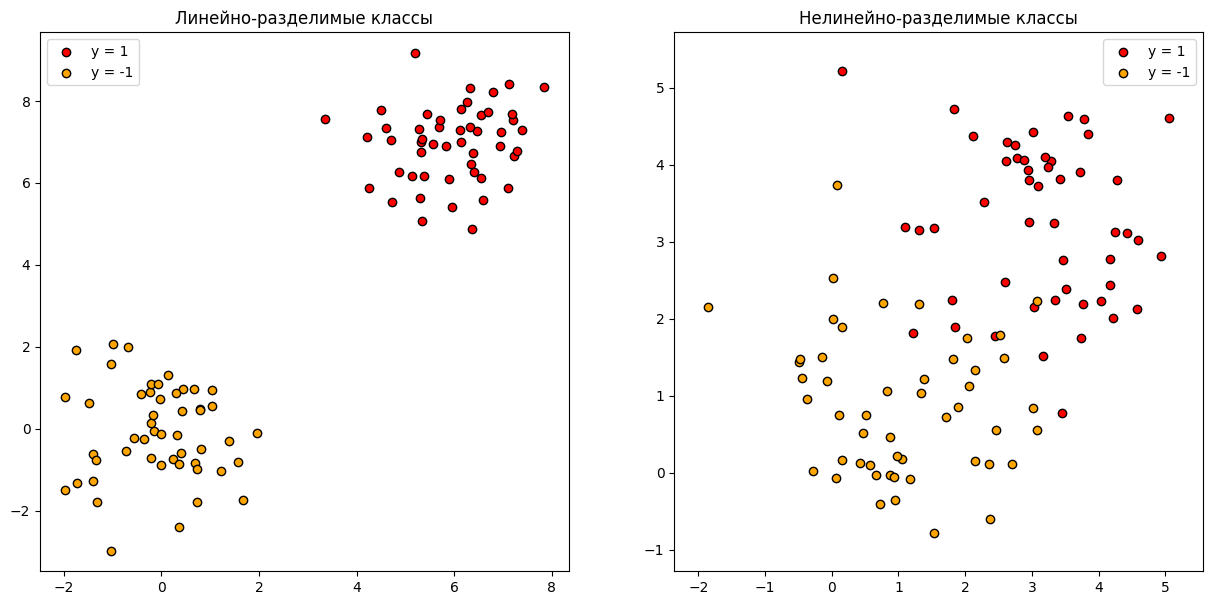

In [72]:
datasets = [X1, X2, X3]
targets = [y1, y2, y3]
titles = ['Линейно-разделимые классы', 'Нелинейно-разделимые классы', 'Нелинейно-разделимые классы']

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
for i in range(2):
    plot_graph(ax[i], datasets[i], targets[i], titles[i])

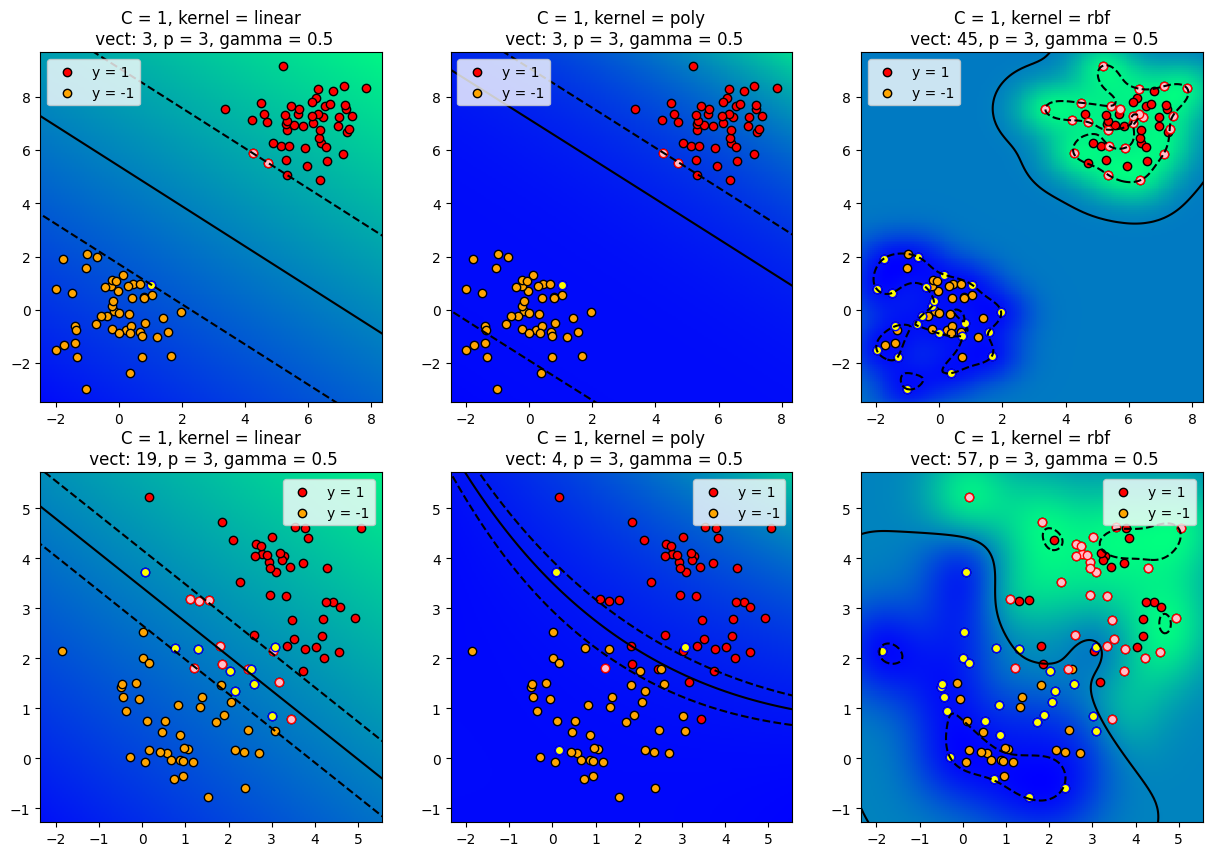

In [78]:
kernel = ['linear', 'poly', 'rbf']

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
C = 1
p = 3
gamma = 0.5

for i in range(2):
    for j in range(3):
        X = datasets[i]
        y = targets[i]
        y = y.astype(float)
        
        svm = DualSVM(C, X, y, kernel[j], p, gamma)
        svm.fit()
        
        xx_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 200)
        yy_vals = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 200)
        
        xx, yy = np.meshgrid(xx_vals, yy_vals)
    
        XX = np.array([xx.ravel(), yy.ravel()])
        zz = np.reshape(svm.predict_proba(XX.T), yy.shape)
        
        S = svm.vectors()
        vect_0 = X[(y == 1) * S]
        vect_1 = X[(y == -1) * S]
        
        titles[j] = (f'C = {C}, kernel = {kernel[j]}\n vect: {sum(S)}, p = {p}, gamma = {gamma}')
        c = ax[i][j].pcolormesh(xx, yy, zz, cmap='winter', zorder=0)
    
        ax[i][j].contour(xx, yy, zz, levels=(1.0,), colors='k', linewidths=1.5, linestyles ='dashed')
        ax[i][j].contour(xx, yy, zz, levels=(0.0,), colors='k', linewidths=1.5)
        ax[i][j].contour(xx, yy, zz, levels=(-1.0,), colors='k', linewidths=1.5, linestyles ='dashed')
        plot_graph(ax[i][j], X, y, titles[j])
        ax[i][j].scatter(vect_0[:, 0], vect_0[:, 1], c='pink', edgecolor='red')
        ax[i][j].scatter(vect_1[:, 0], vect_1[:, 1], c='yellow', edgecolor='blue')
        ax[i][j].set_xlabel("")

### 3.3. Как ведет себя SVM с полиномиальным ядром в зависимости от параметров  𝐶 и степени ядра  𝑝

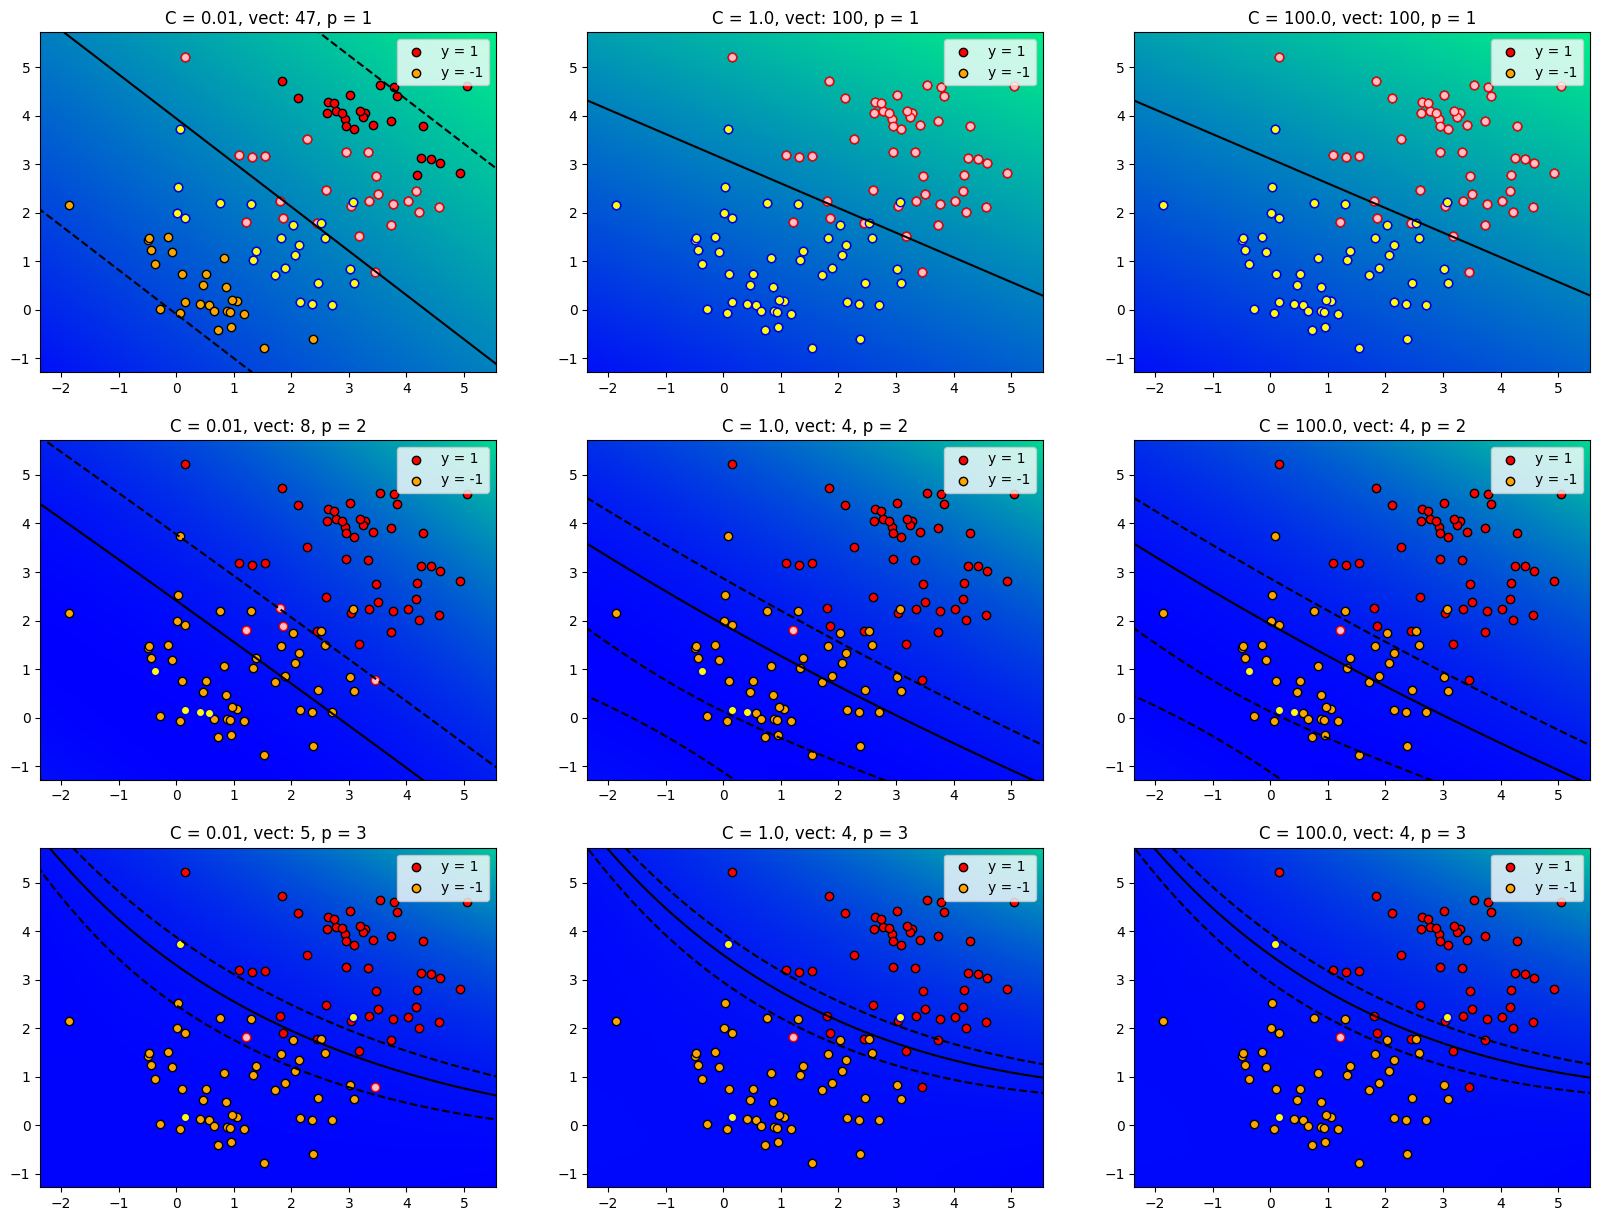

In [85]:
kernel = ['linear', 'poly', 'rbf']

fig, ax = plt.subplots(3, 3, figsize=(20, 15))
parametr = 0.0001
p = 0
gamma = 1
X = datasets[1]
y = targets[1]
y = y.astype(float)


for i in range(3):
    p = p + 1
    C = parametr
    for j in range(3):
        C = C * 100
        svm = DualSVM(C, X, y,'poly', p, gamma)
        svm.fit()
        
        xx_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 200)
        yy_vals = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 200)
        
        xx, yy = np.meshgrid(xx_vals, yy_vals)
    
        XX = np.array([xx.ravel(), yy.ravel()])
        zz = np.reshape(svm.predict_proba(XX.T), yy.shape)
        
        S = svm.vectors()
        vect_0 = X[(y == 1) * S]
        vect_1 = X[(y == -1) * S]
        
        titles[j] = (f'C = {C}, vect: {sum(S)}, p = {p}')
        c = ax[i][j].pcolormesh(xx, yy, zz, cmap='winter', zorder=0)
    
        ax[i][j].contour(xx, yy, zz, levels=(1.0,), colors='k', linewidths=1.5, linestyles ='dashed')
        ax[i][j].contour(xx, yy, zz, levels=(0.0,), colors='k', linewidths=1.5)
        ax[i][j].contour(xx, yy, zz, levels=(-1.0,), colors='k', linewidths=1.5, linestyles ='dashed')
        plot_graph(ax[i][j], X, y, titles[j])
        ax[i][j].scatter(vect_0[:, 0], vect_0[:, 1], c='pink', edgecolor='red')
        ax[i][j].scatter(vect_1[:, 0], vect_1[:, 1], c='yellow', edgecolor='blue')
        ax[i][j].set_xlabel("")

С повышением степени полинома модель становится точнее. Этому же способствует повышение С

### 3.4. Как ведет себя SVM с RBF-ядром в зависимости от параметров  𝐶 и  𝛾? Поварьируйте параметры  𝐶 и  𝛾 по логарифмической сетке. Какие значения параметров ведут к переобучению, а какие — к слишком грубой модели?

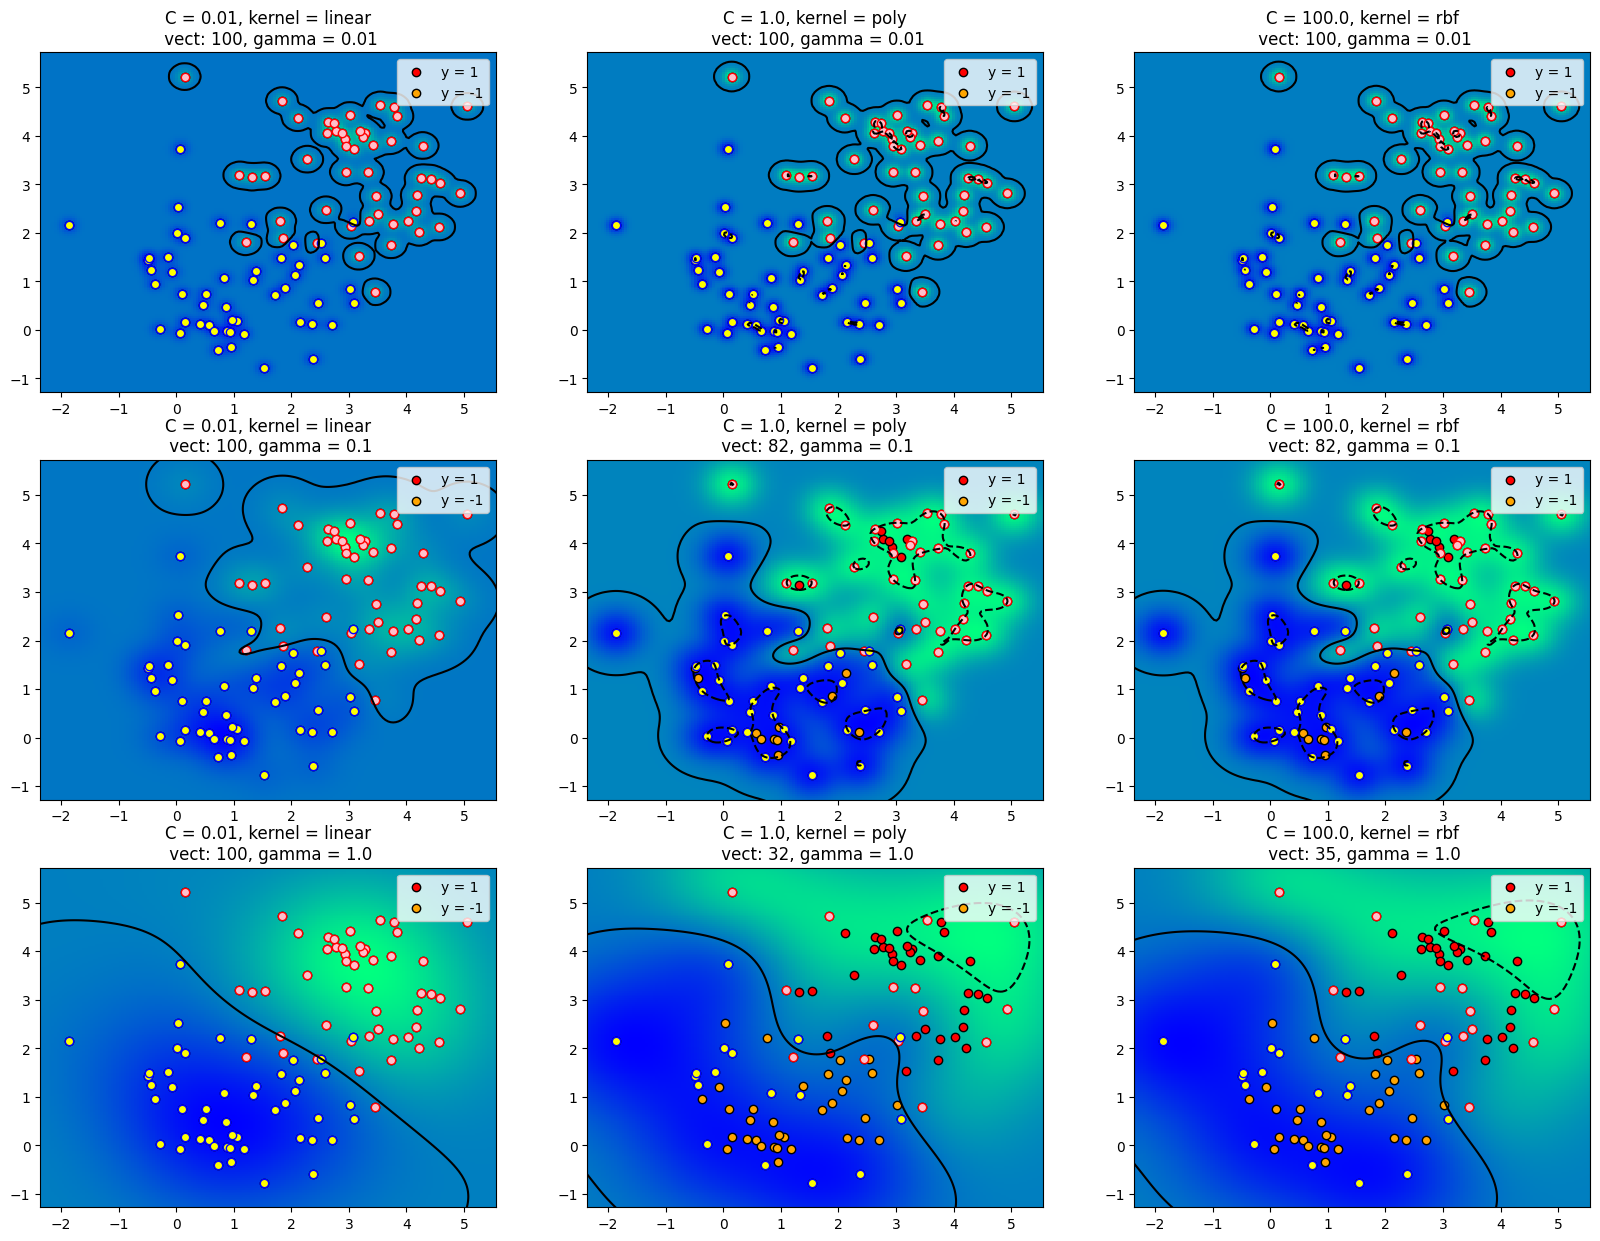

In [84]:
kernel = ['linear', 'poly', 'rbf']

fig, ax = plt.subplots(3, 3, figsize=(20, 15))
parametr = 0.0001
p = 2
gamma = 0.001
X = datasets[1]
y = targets[1]
y = y.astype(float)


for i in range(3):
    gamma = gamma * 10
    C = parametr
    for j in range(3):
        C = C * 100
        svm = DualSVM(C, X, y,'rbf', p, gamma)
        svm.fit()
        
        xx_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 200)
        yy_vals = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 200)
        
        xx, yy = np.meshgrid(xx_vals, yy_vals)
    
        XX = np.array([xx.ravel(), yy.ravel()])
        zz = np.reshape(svm.predict_proba(XX.T), yy.shape)
        
        S = svm.vectors()
        vect_0 = X[(y == 1) * S]
        vect_1 = X[(y == -1) * S]
        
        titles[j] = (f'C = {C}, kernel = {kernel[j]}\n vect: {sum(S)}, gamma = {gamma}')
        c = ax[i][j].pcolormesh(xx, yy, zz, cmap='winter', zorder=0)
    
        ax[i][j].contour(xx, yy, zz, levels=(1.0,), colors='k', linewidths=1.5, linestyles ='dashed')
        ax[i][j].contour(xx, yy, zz, levels=(0.0,), colors='k', linewidths=1.5)
        ax[i][j].contour(xx, yy, zz, levels=(-1.0,), colors='k', linewidths=1.5, linestyles ='dashed')
        plot_graph(ax[i][j], X, y, titles[j])
        ax[i][j].scatter(vect_0[:, 0], vect_0[:, 1], c='pink', edgecolor='red')
        ax[i][j].scatter(vect_1[:, 0], vect_1[:, 1], c='yellow', edgecolor='blue')
        ax[i][j].set_xlabel("")

Чем меньше значения гамма, тем больше модель переобучается. В случае с большим гаммой, модель описывает данные более обобщенно.